In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/CC GENERAL.xls')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.isnull().sum().sum()

314

In [6]:
df[df['MINIMUM_PAYMENTS'].isna()].shape[0], df[df.isna().any(axis=1)].shape[0], df.shape[0]

(313, 314, 8950)

In [7]:
df_tmp = df.loc[:, df.columns != 'MINIMUM_PAYMENTS']
df_tmp[df_tmp.isna().any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,0.0,6


In [8]:
df[df.isna().any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [9]:
df = df.dropna()
clust_col = ['blue', 'red', 'green', 'yellow', 'black']

## Easy

In [10]:
corr_matrix = df.loc[:, (df.columns != 'CUST_ID') & (df.columns != 'kmeans')].corr()
corr_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


In [11]:
bad_features = ['CUST_ID', 'PURCHASES', 'CASH_ADVANCE_TRX', 'MINMUM_PAYMENTS', 'PAYMENTS', 'CREDIT', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'BALANCE', 'TENURE', 'PRC_FULL_PAYMENT', 'ONEOFF_PURCHASES', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [12]:
print(f"Признаки, которые остались: {[x for x in df.columns if x not in bad_features]}")

Признаки, которые остались: ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX']


Посмотрим на оптимальное количество кластеров

In [13]:
def distance_by_n(x, n):
    model = KMeans(n_clusters=n)
    model.fit(x)
    return model.inertia_

Text(0.5, 1.0, 'Elbow method')

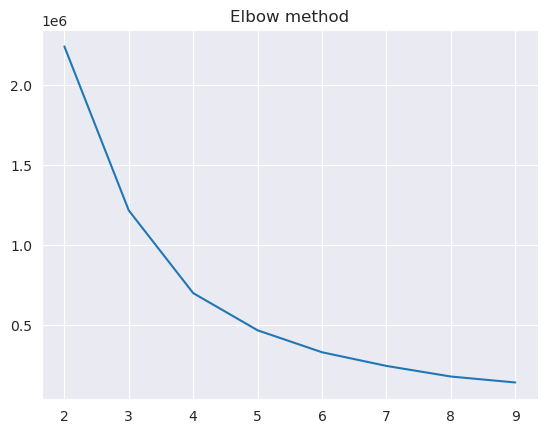

In [14]:
if 'kmeans' in df.columns: 
    df.drop(columns='kmeans', inplace=True)
distances = [distance_by_n(df.loc[:, ~df.columns.isin(bad_features)], n) for n in range(2, 10)]
plt.plot(range(2, 10), distances)
plt.title('Elbow method')

Видно, что есть небольшой перегиб при 4-х кластерах, но мы проверим разбиение на 4, 3 и 2 кластера

In [15]:
def kmeans_proc(n_clusters: int, df: pd.DataFrame, bad_features: list):
    kmeans = KMeans(n_clusters=n_clusters)
    if 'kmeans' in df.columns: 
        df.drop(columns='kmeans', inplace=True)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(df.loc[:, ~df.columns.isin(bad_features)])
    data_scaled = pd.DataFrame(data_scaled, columns=[x for x in df.columns if x not in bad_features])
    model_labels = kmeans.fit_predict(data_scaled)
    data_scaled['kmeans'] = model_labels
    ax2 = sns.pairplot(data_scaled, hue='kmeans', palette=clust_col)
    ax2.savefig(f"../images/{n_clusters}_clusters_attempt.png")
    plt.close()

In [16]:
kmeans_proc(4, df, bad_features)

![localImage](../images/4_clusters_attempt.png)

Видно, что почти на каждом графике, всё разбивается на 2-3 кластера и шум. Значит, не подходит такое количество кластеров

In [17]:
kmeans_proc(3, df, bad_features)

![localImage](../images/3_clusters_attempt.png)

Аналогичная ситуация и 3-мя кластерами, есть графики, где почти полностью все пользователи лежат в одном класетере

In [18]:
kmeans_proc(2, df, bad_features)

![localImage](../images/2_clusters_attempt.png)

Уже лучше, конечно, всё ещё попадается шум, но большая часть графиков разбита на 2 кластера с минимальным количеством шума

Можно попробовать проинтерпретировать кластеры. Класетры мы разбивали по частоте пополнения баланса и совершения различных видов покупок. Видно, что те, кто часто совершают покупки, делают покупки one-go и в рассрочку. Также, если посмотреть на пересечения частоты one-go покупок и installments покупок, то можно заметить, что синим цветом отмечены те, кто покупает редко, а красным - часто. Причём те, кто часто пользуется расскрочкой также часто покупают one-go. Остальные же графики не дают болше информации, т.к. либо точки определенного цвета распределены равномерно, либо экспоненциально. Значит, пользователи разбиты на 2 кластера. Синий - совершают покупки редко, используя услуги банка. Красный - совершают покупки часто, используя услугами банка

## Normal

In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

Воспользуемся иерархической кластеризацией

In [20]:
if 'kmeans' in df.columns: 
    df.drop(columns='kmeans', inplace=True)

if 'agg_res' in df.columns: 
    df.drop(columns='agg_res', inplace=True)
    
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df.loc[:, ~df.columns.isin(bad_features)])
data_scaled = pd.DataFrame(data_scaled, columns=[x for x in df.columns if x not in bad_features])
agg_result = AgglomerativeClustering(3).fit_predict(data_scaled)
data_scaled['agg_res'] = agg_result
ax3 = sns.pairplot(data_scaled, hue='agg_res', palette=clust_col)
ax3.savefig("../images/3_Aggl_clust.png")
plt.close()

![localImage](../images/3_Aggl_clust.png)

Некоторые графики показывают хорошее разбиение, однако очень часто один из кластеров показывает просто шум

In [21]:
if 'kmeans' in df.columns: 
    df.drop(columns='kmeans', inplace=True)

if 'agg_res' in df.columns: 
    df.drop(columns='agg_res', inplace=True)
    
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df.loc[:, ~df.columns.isin(bad_features)])
data_scaled = pd.DataFrame(data_scaled, columns=[x for x in df.columns if x not in bad_features])
agg_result = AgglomerativeClustering(2).fit_predict(data_scaled)
data_scaled['agg_res'] = agg_result
ax3 = sns.pairplot(data_scaled, hue='agg_res', palette=clust_col)
ax3.savefig("../images/2_Aggl_clust.png")
plt.close()

![localImage](../images/2_Aggl_clust.png)

Результат почти как у Kmeans 

Построим дендрограмму

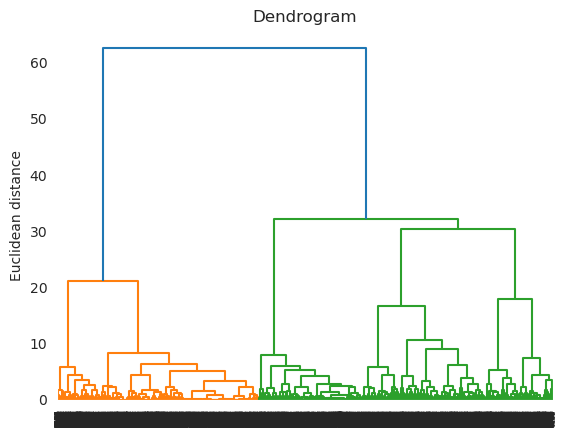

In [22]:
data_scaled = scaler.fit_transform(df.loc[:, ~df.columns.isin(bad_features)])
data_scaled = pd.DataFrame(data_scaled, columns=[x for x in df.columns if x not in bad_features])
Z = linkage(data_scaled, method = 'ward')

dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Видно, что метод ward разбивает пользователей на 2 кластера,

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
if 'kmeans' in df.columns: 
    df.drop(columns='kmeans', inplace=True)

if 'agg_res' in df.columns: 
    df.drop(columns='agg_res', inplace=True)

data_scaled = scaler.fit_transform(df.loc[:, ~df.columns.isin(bad_features)])
data_scaled = pd.DataFrame(data_scaled, columns=[x for x in df.columns if x not in bad_features])
flag = False

for eps in range(20, 1000):
    for min_s in range(2, 20):
        result = DBSCAN(eps=eps / 100, min_samples=min_s).fit_predict(data_scaled)
        print(eps / 100, min_s, np.unique(result).shape[0])
        if (np.unique(result).shape[0] == 4):
            data_scaled['DBSCAN'] = result
            ax3 = sns.pairplot(data_scaled, hue='DBSCAN', palette=clust_col)
            ax3.savefig("../images/DBSCAN_clust.png")
            plt.close()
            flag = True
            break
    if flag:
        break

0.2 2 5
0.2 3 3
0.2 4 2
0.2 5 2
0.2 6 2
0.2 7 2
0.2 8 2
0.2 9 2
0.2 10 2
0.2 11 2
0.2 12 2
0.2 13 2
0.2 14 2
0.2 15 2
0.2 16 2
0.2 17 2
0.2 18 2
0.2 19 2
0.21 2 4


![localImage](../images/DBSCAN_clust.png)

DBSCAN при 3 кластерах почти всех пользователей внёс в один кластер, а остальные кластеры содержат очень малое количество представителей

Воспользуемся моделью гауссовой смеси

In [25]:
from sklearn.mixture import GaussianMixture

In [26]:
data_scaled = scaler.fit_transform(df.loc[:, ~df.columns.isin(bad_features)])
data_scaled = pd.DataFrame(data_scaled, columns=[x for x in df.columns if x not in bad_features])
result = GaussianMixture(n_components=2).fit_predict(data_scaled)
data_scaled['GaussianMixture'] = result
ax4 = sns.pairplot(data_scaled, hue='GaussianMixture', palette=clust_col)
ax4.savefig("../images/Gaussian_clust.png")
plt.close()

![localImage](../images/Gaussian_clust.png)

Кажется, что результат хуже, чему у kmeans,

Теперь попробуем спектральную кластеризацию

In [27]:
from sklearn.cluster import SpectralClustering

In [28]:
data_scaled = scaler.fit_transform(df.loc[:, ~df.columns.isin(bad_features)])
data_scaled = pd.DataFrame(data_scaled, columns=[x for x in df.columns if x not in bad_features])
result = SpectralClustering(n_clusters=3).fit_predict(data_scaled)
data_scaled['Spectral_clust'] = result
ax4 = sns.pairplot(data_scaled, hue='Spectral_clust', palette=clust_col)
ax4.savefig("../images/3_Spectral_clust.png")
plt.close()

![localImage](../images/3_Spectral_clust.png)

Пока что, это самое лучшее разбиение на 3 кластера. Но теперь посмотрим на 2 кластера

In [29]:
data_scaled = scaler.fit_transform(df.loc[:, ~df.columns.isin(bad_features)])
data_scaled = pd.DataFrame(data_scaled, columns=[x for x in df.columns if x not in bad_features])
result = SpectralClustering(n_clusters=2).fit_predict(data_scaled)
data_scaled['Spectral_clust'] = result
ax4 = sns.pairplot(data_scaled, hue='Spectral_clust', palette=clust_col)
ax4.savefig("../images/2_Spectral_clust.png")
plt.close()

![localImage](../images/2_Spectral_clust.png)

Кажется, что это такое же разбиение, что и у kmeans. Значит, и разбивается на тех кто часто делает покупки и нет. Однако, можно посмотреть на разбиение на 3 кластера. Тут уже разбиение на синий кластер - те, кто часто покупает one-go; красный -  те, кто часто покупает в рассрочку, но редко в one-go. Зелёный - редко делает покупки. Стоит тогда посмотреть на разбиение на 4 кластера, это может нам дать ещё одну группу пользователей

In [30]:
data_scaled = scaler.fit_transform(df.loc[:, ~df.columns.isin(bad_features)])
data_scaled = pd.DataFrame(data_scaled, columns=[x for x in df.columns if x not in bad_features])
result = SpectralClustering(n_clusters=4).fit_predict(data_scaled)
data_scaled['Spectral_clust'] = result
ax4 = sns.pairplot(data_scaled, hue='Spectral_clust', palette=clust_col)
ax4.savefig("../images/4_Spectral_clust.png")
plt.close()

![localImage](../images/4_Spectral_clust.png)

К сожаелению, это не дало нам новую группу пользователей. Значит, оптимальное разбиение либо на 2 группы по частоте покупок, либо на 3 по частоте пользования услугами банка